In [67]:
using OptimalControl
using NLPModelsIpopt
using Plots
using MadNLP

# ------------------ Parameters ------------------
kP = 1.6
K = 140.0
I_max = 300.0       # 最大光照强度
α = 0.1
L = 50.0            # 水体深度上限
kR_bar = 1.5
z_bar = 35.0
ϵ = 0.005

function OCP(n::Int=3; tf::Float64=30.0)
    # 局部变量，直接是数字
    Tfinal = tf

    I_light_surface(t) = I_max * (max(0, sin(2π * t)))^2
    I_light(z, t) = I_light_surface(t) * exp(-α * z)

    vP(p, z, t) = kP * p * I_light(z, t) / (K + p * I_light(z, t))
    kR(z)       = kR_bar * z^n / (z_bar^n + z^n)

    ocp = @def begin
        t ∈ [0, Tfinal], time    # ✅ 直接用局部变量，不用 $
        x = (c, p, z) ∈ R^3, state
        U ∈ R^2, control

        c(0) == 0.1
        p(0) == 0.8
        z(0) == 10.0

        0 ≤ U(t)[1] ≤ 1
        -34 ≤ U(t)[2] ≤ 34

        0 ≤ c(t) ≤ 1
        0 ≤ p(t) ≤ 1
        0 ≤ z(t) ≤ L
        c(t) + p(t) ≤ 1

        ẋ(t) == [
            vP(p(t), z(t), t) * (1 - c(t)) - kR(z(t)) * c(t) * (1 - c(t) - p(t)),
            U(t)[1] * kR(z(t)) * c(t) * (1 - c(t) - p(t)) - vP(p(t), z(t), t) * p(t),
            U(t)[2]
        ]

        ∫(vP(p(t), z(t), t) - ϵ * U(t)[2]^2) → max
    end

 
    # ------------------ 逐步求解策略 ------------------
    sol1 = solve(ocp, :direct, :adnlp, :madnlp; disc_method=:gauss_legendre_2, grid_size=50,  display=false)
    sol2 = solve(ocp, :direct, :adnlp, :madnlp; disc_method=:gauss_legendre_2, init=sol1, grid_size=100, display=false)
    sol3 = solve(ocp, :direct, :adnlp, :madnlp; disc_method=:gauss_legendre_2, init=sol2, grid_size=200, display=false)
    sol4 = solve(ocp, :direct, :adnlp, :ipopt;   disc_method=:gauss_legendre_2, init=sol3, grid_size=300, display=false)
    sol5 = solve(ocp, :direct, :adnlp, :ipopt;   disc_method=:gauss_legendre_2, init=sol4, grid_size=400, display=false)
    sol6 = solve(ocp, :direct, :adnlp, :ipopt;   disc_method=:gauss_legendre_2, init=sol5, grid_size=500, display=false)
    sol7 = solve(ocp, :direct, :adnlp, :ipopt;   disc_method=:gauss_legendre_2, init=sol6, grid_size=600, display=false)
    sol8 = solve(ocp, :direct, :adnlp, :ipopt;   disc_method=:gauss_legendre_2, init=sol7, grid_size=700, display=false)
    sol  = solve(ocp, :direct, :adnlp, :ipopt;   disc_method=:gauss_legendre_2, init=sol8, grid_size=800, display=true)

    # ------------------ 结果可视化 ------------------
    plt = plot(sol)
    display(plt)

    return sol, plt
end


OCP (generic function with 3 methods)

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_ix0XGjO1C5\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_sPyrqDGJ25\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_GzO5iDctCv\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_SV0H0FO5Ih\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    59204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:    44000

Total number of variables............................:    11204
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     9604
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.23e+00 2.02e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_khmHWFO1oZ\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_eBuj6ZQDO5\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


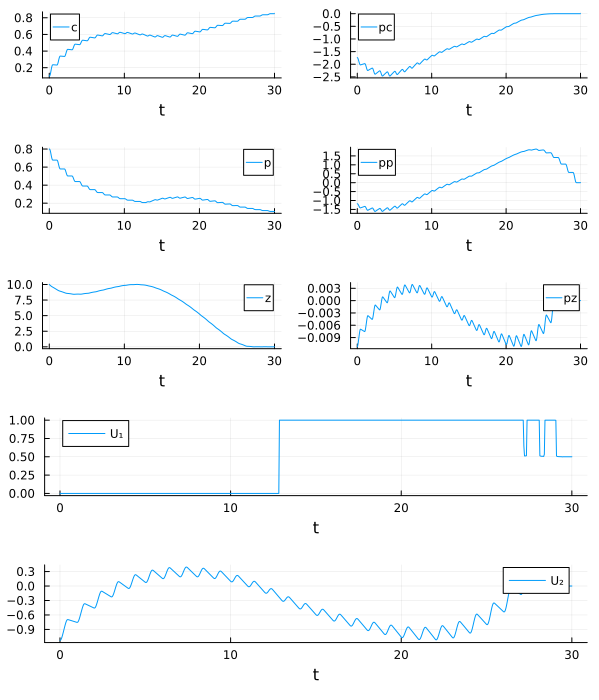

(CTModels.Solution{CTModels.TimeGridModel{Vector{Float64}}, CTModels.TimesModel{CTModels.FixedTimeModel{Int64}, CTModels.FixedTimeModel{Float64}}, CTModels.StateModelSolution{CTModels.var"#65#78"{Interpolations.Extrapolation{Vector{Float64}, 1, Interpolations.GriddedInterpolation{Vector{Float64}, 1, Vector{Vector{Float64}}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Tuple{Vector{Float64}}}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Interpolations.Line{Nothing}}}}, CTModels.ControlModelSolution{CTModels.var"#67#80"{Interpolations.Extrapolation{Vector{Float64}, 1, Interpolations.GriddedInterpolation{Vector{Float64}, 1, Vector{Vector{Float64}}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Tuple{Vector{Float64}}}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Interpolations.Line{Nothing}}}}, CTModels.

In [69]:
OCP(1; tf=30.0) 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_S1GVy54t8V\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_oBI7oDWD6H\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_YfClSNk5eP\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_4RGzezcjK5\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    59204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:    44000

Total number of variables............................:    11204
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     9604
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 2.08e+00 2.19e-02   0.0 0.00e+00    -  0.00e+00 0.00e+00 

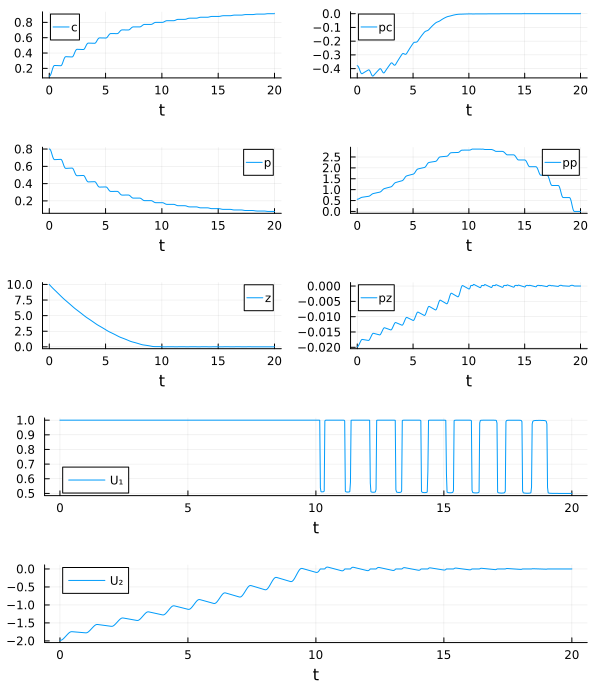

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_eBM7YrS5ux\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


(CTModels.Solution{CTModels.TimeGridModel{Vector{Float64}}, CTModels.TimesModel{CTModels.FixedTimeModel{Int64}, CTModels.FixedTimeModel{Float64}}, CTModels.StateModelSolution{CTModels.var"#65#78"{Interpolations.Extrapolation{Vector{Float64}, 1, Interpolations.GriddedInterpolation{Vector{Float64}, 1, Vector{Vector{Float64}}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Tuple{Vector{Float64}}}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Interpolations.Line{Nothing}}}}, CTModels.ControlModelSolution{CTModels.var"#67#80"{Interpolations.Extrapolation{Vector{Float64}, 1, Interpolations.GriddedInterpolation{Vector{Float64}, 1, Vector{Vector{Float64}}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Tuple{Vector{Float64}}}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Interpolations.Line{Nothing}}}}, CTModels.

In [70]:
OCP(1; tf=20.0) 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_8t6dAhAZaD\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_m9YHI9alk7\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_4P0hEhA96N\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_KrKX4psl0V\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzS

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.8.0.

Number of nonzeros in equality constraint Jacobian...:    59204
Number of nonzeros in inequality constraint Jacobian.:     3204
Number of nonzeros in Lagrangian Hessian.............:    44000

Total number of variables............................:    11204
                     variables with only lower bounds:        0
                variables with lower and upper bounds:     2403
                     variables with only upper bounds:        0
Total number of equality constraints.................:     9604
Total number of inequality constraints...............:     2403
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:     1602
        inequality constraints with only upper bounds:      801

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e-01 1.56e+00 2.99e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_KVutOd8vMl\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297
┌ Warning: could not parse Ipopt log file. SystemError("opening file \"C:\\\\Users\\\\gouxinyi\\\\AppData\\\\Local\\\\Temp\\\\jl_WH8XMTazSt\"", 13, nothing)
└ @ NLPModelsIpopt C:\Users\gouxinyi\.julia\packages\NLPModelsIpopt\OGzSv\src\NLPModelsIpopt.jl:297


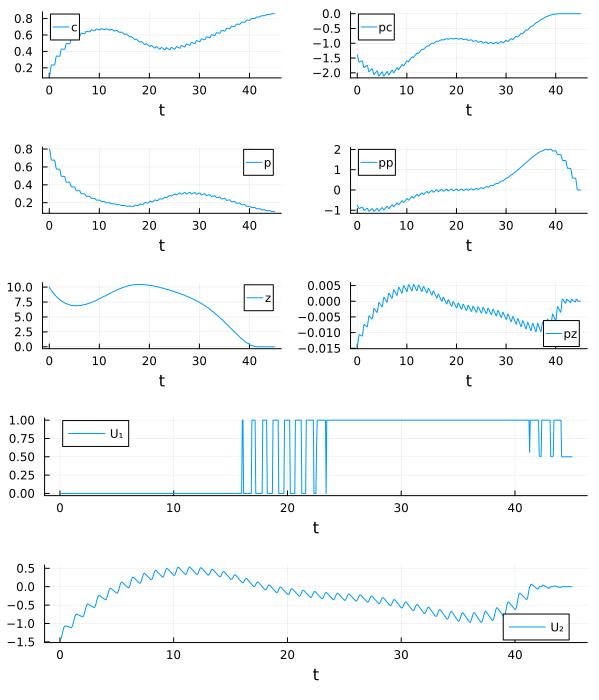

(CTModels.Solution{CTModels.TimeGridModel{Vector{Float64}}, CTModels.TimesModel{CTModels.FixedTimeModel{Int64}, CTModels.FixedTimeModel{Float64}}, CTModels.StateModelSolution{CTModels.var"#65#78"{Interpolations.Extrapolation{Vector{Float64}, 1, Interpolations.GriddedInterpolation{Vector{Float64}, 1, Vector{Vector{Float64}}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Tuple{Vector{Float64}}}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Interpolations.Line{Nothing}}}}, CTModels.ControlModelSolution{CTModels.var"#67#80"{Interpolations.Extrapolation{Vector{Float64}, 1, Interpolations.GriddedInterpolation{Vector{Float64}, 1, Vector{Vector{Float64}}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Tuple{Vector{Float64}}}, Interpolations.Gridded{Interpolations.Linear{Interpolations.Throw{Interpolations.OnGrid}}}, Interpolations.Line{Nothing}}}}, CTModels.

In [71]:
OCP(1; tf=45.0) 